@Author: Bhupinder Singh

@Date: 23-12-2022

@Last Modified by: Bhupinder Singh

@Last Modified date: 24-12-2022

@Title: CNN model for binary class classification

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

### Reading the dataset

In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Data Scaling

In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### Creation Of cnn model

In [5]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
250/250 [==============================] - 489s 2s/step - loss: 3.1515 - accuracy: 0.5546 - val_loss: 1.0480 - val_accuracy: 0.5170
Epoch 2/10
250/250 [==============================] - 477s 2s/step - loss: 0.8264 - accuracy: 0.5469 - val_loss: 0.8135 - val_accuracy: 0.5035
Epoch 3/10
250/250 [==============================] - 654s 3s/step - loss: 0.6762 - accuracy: 0.5936 - val_loss: 0.7836 - val_accuracy: 0.5885
Epoch 4/10
250/250 [==============================] - 482s 2s/step - loss: 0.6313 - accuracy: 0.6330 - val_loss: 0.6785 - val_accuracy: 0.6435
Epoch 5/10
250/250 [==============================] - 2420s 10s/step - loss: 0.5944 - accuracy: 0.6615 - val_loss: 0.5961 - val_accuracy: 0.6635
Epoch 6/10
250/250 [==============================] - 484s 2s/step - loss: 0.5545 - accuracy: 0.7000 - val_loss: 0.6983 - val_accuracy: 0.6650
Epoch 7/10
250/250 [==============================] - 2157s 9s/step - loss: 0.5208 - accuracy: 0.7096 - val_loss: 0.5353 - val_accuracy: 0.7

### Training and validation accuracy curve

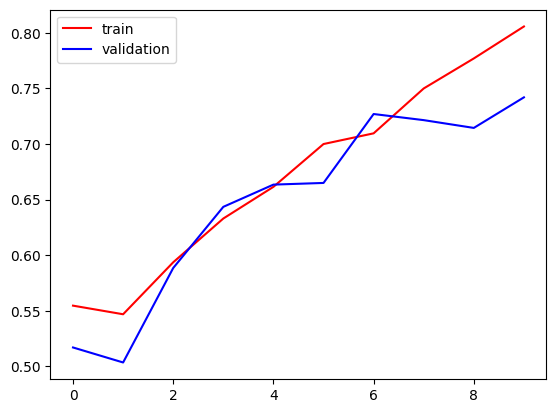

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()